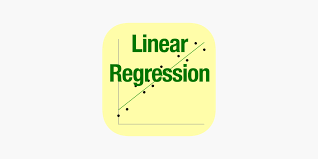

Linear Regression:

It is a machine learning algorithm based on supervised learning. It performs a regression task. 
Regression models a target prediction value based on independent variables. 
It is mostly used for finding out the relationship between variables and forecasting. 
Different regression models differ based on – the kind of relationship between dependent and 
independent variables, they are considering and the number of independent variables being used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a=int(input('Enter the x values range :'))
x=[i for i in range(1,a+1)]
y=[]
for j in range(1,a+1):
    b=float(input('Enter the Y_values :'))
    y.append(b)
    

Enter the x values range :10
Enter the Y_values :1.7
Enter the Y_values :4.0
Enter the Y_values :6.9
Enter the Y_values :9.5
Enter the Y_values :11.7
Enter the Y_values :13.9
Enter the Y_values :16.6
Enter the Y_values :19.3
Enter the Y_values :22.8
Enter the Y_values :25.1


In [2]:
df=pd.DataFrame(
       data={
           "x":x,
           "y":y
       }
) 
df

,x,y
0,1,1.7
1,2,4.0
2,3,6.9
3,4,9.5
4,5,11.7
5,6,13.9
6,7,16.6
7,8,19.3
8,9,22.8
9,10,25.1


$$ m = \frac{n\sum x*y - \sum x\sum y}{n\sum x^{2} - (\sum x)^{2}} $$   




$$ b = \frac{\sum y - m * \sum x}{n}$$


$$y_{pred} = m\sum_{i = 1}^{n}x + b$$

$$ squarederror = \sum_{i=0}^{n}  (y_{pred} - y_{org})^{2}$$

In [3]:
df['xy']=df['x']*df['y']
df['x^2']=df['x']**2
df

,x,y,xy,x^2
0,1,1.7,1.7,1
1,2,4.0,8.0,4
2,3,6.9,20.7,9
3,4,9.5,38.0,16
4,5,11.7,58.5,25
5,6,13.9,83.4,36
6,7,16.6,116.2,49
7,8,19.3,154.4,64
8,9,22.8,205.2,81
9,10,25.1,251.0,100


In [4]:
class linear_regression:
    def __init__(self,df):
        self.n = len(df)
        self.sum_xy=df['xy'].sum()
        self.sum_x = df['x'].sum()
        self.sum_y = df['y'].sum()
        self.sum_x_2 = df['x^2'].sum()
        self.sum_x_h_2 = self.sum_x ** 2        
## finding 'm'        
        self.numerator_m=(self.n*self.sum_xy)-(self.sum_x*self.sum_y)
        self.denominator_m=(self.n*self.sum_x_2)-(self.sum_x_h_2)
        self.mvalue=self.numerator_m/self.denominator_m
        
## finding 'b'        
        self.numerator_b=(self.sum_y)-(self.mvalue*self.sum_x)
        self.denominator_b=self.n
        self.bvalue=self.numerator_b/self.denominator_b
        
        self.y_prd = [round((self.mvalue * xi + self.bvalue), 2) for xi in df['x']]

    
    def m_value(self):
        return self.mvalue    
    
    def b_value(self):
        return self.bvalue    
    
    def y_pred(self):
        
        y_pred = [round((self.mvalue * xi + self.bvalue), 2) for xi in df['x']]
        return y_pred 
    
    def squared_error(self):
        sq_e = sum([(y_pred_value - y_org_value) ** 2 
                for y_pred_value, y_org_value in zip(self.y_prd, df['y'].values)])
        return sq_e
    


In [5]:
m_val=linear_regression(df)
m=m_val.m_value()
print("Value of m is :",m)

Value of m is : 2.5921212121212123


In [6]:
b_val=linear_regression(df)
b=b_val.b_value()
print("Value of b is :",b)

Value of b is : -1.1066666666666662


In [7]:

y_val=linear_regression(df)
y=y_val.y_pred()
print("Value of predicted y is :",y)



Value of predicted y is : [1.49, 4.08, 6.67, 9.26, 11.85, 14.45, 17.04, 19.63, 22.22, 24.81]


In [8]:
se_val=linear_regression(df)
sqe=se_val.squared_error()
print("Value of Squared Error is :",sqe)

Value of Squared Error is : 1.2089999999999999


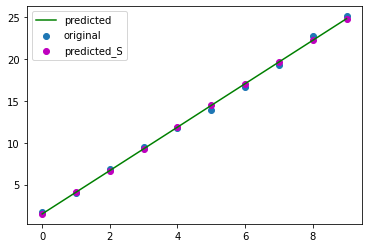

In [9]:
class graph:
    def __init__(self,df,y_pred):
        plt.scatter(list(range(len(df))),df['y'].values,label="original")
        plt.plot(list(range(len(df))),y_pred,c='g',label="predicted")
        plt.scatter(list(range(len(df))),y_pred,c='m',label="predicted_S")
        plt.legend()
        plt.show()
import matplotlib.pyplot as plt
Graph_Var=graph(df,y)